In [140]:
import nltk 
import pandas as pd
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords

import string
import re

In [141]:
original_text = "Yesterday, I went to the grocery stoer and bought apples, bananas, and a bag of potatps. When I got home, I realizeed that I forgot to buy milk, so I had to go back. The cashier at the stoer was very frendly and even gave me a discount on the milk. Later, I made a delicius apple pie, but I accidentally burnt the crust. My freind John said it still tasted good though. Overall, it was a prety eventful day. I hope I'll get this time toomorow aslo."
sente_token= sent_tokenize(original_text)


### Converting to pandas Dataframe

In [142]:
df = pd.DataFrame({"data":sente_token})
df

,data
0,"Yesterday, I went to the grocery stoer and bou..."
1,"When I got home, I realizeed that I forgot to ..."
2,The cashier at the stoer was very frendly and ...
3,"Later, I made a delicius apple pie, but I acci..."
4,My freind John said it still tasted good though.
5,"Overall, it was a prety eventful day."
6,I hope I'll get this time toomorow aslo.


In [143]:
# Lowercasing 
df["lower"] = df["data"].apply(lambda x: " ".join(x.lower() for x in str(x).split()))
df.drop(columns=["data"],inplace = True)
df

,lower
0,"yesterday, i went to the grocery stoer and bou..."
1,"when i got home, i realizeed that i forgot to ..."
2,the cashier at the stoer was very frendly and ...
3,"later, i made a delicius apple pie, but i acci..."
4,my freind john said it still tasted good though.
5,"overall, it was a prety eventful day."
6,i hope i'll get this time toomorow aslo.


In [144]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

### Replacement Pattern

In [145]:
replacement_patterns = [
 (r'won\'t', 'will not'),
 (r'can\'t', 'cannot'),
 (r'i\'m', 'i am'),
 (r'ain\'t', 'is not'),
 (r'(\w+)\'ll', '\g<1> will'),
 (r'(\w+)n\'t', '\g<1> not'),
 (r'(\w+)\'ve', '\g<1> have'),
 (r'(\w+)\'s', '\g<1> is'),
 (r'(\w+)\'re', '\g<1> are'),
 (r'(\w+)\'d', '\g<1> would')
]
patterns = [(re.compile(regex), repl) for (regex, repl) in replacement_patterns]

def replace_function(text):
    s = text
    for (pattern, repl) in patterns:
        s = re.sub(pattern, repl, s)
    return s

In [146]:
# remove punctuation
df["new"]=df["lower"].apply(replace_function).apply(lambda x: "".join(i for i in x if i not in string.punctuation))
df

,lower,new
0,"yesterday, i went to the grocery stoer and bou...",yesterday i went to the grocery stoer and boug...
1,"when i got home, i realizeed that i forgot to ...",when i got home i realizeed that i forgot to b...
2,the cashier at the stoer was very frendly and ...,the cashier at the stoer was very frendly and ...
3,"later, i made a delicius apple pie, but i acci...",later i made a delicius apple pie but i accide...
4,my freind john said it still tasted good though.,my freind john said it still tasted good though
5,"overall, it was a prety eventful day.",overall it was a prety eventful day
6,i hope i'll get this time toomorow aslo.,i hope i will get this time toomorow aslo


In [147]:
df.drop(columns=["lower"],axis="column",inplace= True)

In [148]:

df["no_stop_words"]=df["new"].apply(lambda x:" ".join(i for i in x.split() if i not in stopwords.words("english")))
df

,new,no_stop_words
0,yesterday i went to the grocery stoer and boug...,yesterday went grocery stoer bought apples ban...
1,when i got home i realizeed that i forgot to b...,got home realizeed forgot buy milk go back
2,the cashier at the stoer was very frendly and ...,cashier stoer frendly even gave discount milk
3,later i made a delicius apple pie but i accide...,later made delicius apple pie accidentally bur...
4,my freind john said it still tasted good though,freind john said still tasted good though
5,overall it was a prety eventful day,overall prety eventful day
6,i hope i will get this time toomorow aslo,hope get time toomorow aslo


In [149]:
df.drop(columns=["new"],inplace=True)

### Spelling Correction

In [150]:
from textblob import TextBlob
df["correct_spelled"]=df["no_stop_words"].apply(lambda x: str(TextBlob(x).correct()))
df

,no_stop_words,correct_spelled
0,yesterday went grocery stoer bought apples ban...,yesterday went grocer stoner bought apples ban...
1,got home realizeed forgot buy milk go back,got home realized forgot buy milk go back
2,cashier stoer frendly even gave discount milk,cashier stoner friendly even gave discount milk
3,later made delicius apple pie accidentally bur...,later made delicious apple pie accidentally bu...
4,freind john said still tasted good though,friend john said still tasted good though
5,overall prety eventful day,overall pretty eventual day
6,hope get time toomorow aslo,hope get time tomorrow also


I am not so much satisfied with the result as store is not corrected. correct grocery is rejected.

## Apply another Technique Enchant Distance


In [151]:
import enchant
from nltk.metrics import edit_distance
d = enchant.Dict("en_US")

def correct_spellings_all(text):
    words = text.split()
    corrected_words = []
    for word in words:
        if d.check(word):
            corrected_words.append(word)
        else:
            suggestions = d.suggest(word)
            if suggestions:
                if (edit_distance(word,suggestions[0])>1):
                    corrected_words.append(suggestions[0])
                else:
                    corrected_words.append(word)
            else:
                corrected_words.append(word)
    return ' '.join(corrected_words)


In [152]:
df["correct_spelled"]=df["no_stop_words"].apply(correct_spellings_all)
df

,no_stop_words,correct_spelled
0,yesterday went grocery stoer bought apples ban...,yesterday went grocery store bought apples ban...
1,got home realizeed forgot buy milk go back,got home realizeed forgot buy milk go back
2,cashier stoer frendly even gave discount milk,cashier store frendly even gave discount milk
3,later made delicius apple pie accidentally bur...,later made delicius apple pie accidentally bur...
4,freind john said still tasted good though,friend john said still tasted good though
5,overall prety eventful day,overall prety eventful day
6,hope get time toomorow aslo,hope get time tomorrow also


In [153]:
df.drop(columns=["no_stop_words"],inplace=True)

## Lemmatizaion

In [154]:
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from nltk import word_tokenize, pos_tag
from collections import defaultdict
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

lemmatizer = WordNetLemmatizer()

def lemmatize_sentence(text):
    words = nltk.word_tokenize(text)
    corrected_words = []
    for token, tag in pos_tag(words):
        #print(token," ",tag)
        lemma = lemmatizer.lemmatize(token, tag_map[tag[0]])
        corrected_words.append(lemma)
    return ' '.join(corrected_words)

In [155]:
m=lemmatize_sentence("betterly is nice")
m

'betterly be nice'

In [156]:
df["lemmmatized"]=df["correct_spelled"].apply(lemmatize_sentence)
df

,correct_spelled,lemmmatized
0,yesterday went grocery store bought apples ban...,yesterday go grocery store buy apple banana ba...
1,got home realizeed forgot buy milk go back,get home realize forgot buy milk go back
2,cashier store frendly even gave discount milk,cashier store frendly even give discount milk
3,later made delicius apple pie accidentally bur...,later make delicius apple pie accidentally bur...
4,friend john said still tasted good though,friend john say still taste good though
5,overall prety eventful day,overall prety eventful day
6,hope get time tomorrow also,hope get time tomorrow also


## Exploratory Data Analysis

#### Word Frequency

In [157]:
#all words for analysis

all_words = []
for sentence in df['lemmmatized']:
    all_words.extend(sentence.split())

### WordCloud of Present Words

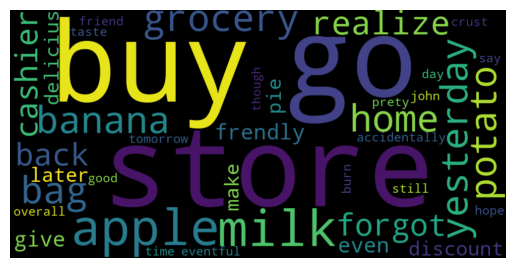

In [158]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width = 1000, height = 500).generate(" ".join(all_words))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Frequency of all words

In [159]:
from nltk.probability import FreqDist,ConditionalFreqDist

fd = FreqDist(all_words)
fd

FreqDist({'go': 2, 'store': 2, 'buy': 2, 'apple': 2, 'get': 2, 'milk': 2, 'yesterday': 1, 'grocery': 1, 'banana': 1, 'bag': 1, ...})

In [161]:
#most common 5 words
print(fd.most_common(5))


[('go', 2), ('store', 2), ('buy', 2), ('apple', 2), ('get', 2)]
